# BANK CUSTOMER CHURN PREDICTION (Müştrerilerin , Bankayı Terk Etme Durumunun Tahmin Edilmesi)

#### Bu porjede amaç müşterin bankayı terk edip etmeyeceğini makine öğrenmesi tahmin modelleri kullanarak terk etme olasılığını tahmin etmek.

## Değişkenler:
- Surname : Soy isim
- CreditScore : Kredi skoru
- Geography : Ülke 
- Gender : Cinsiyet 
- Age : Yaş
- Tenure : Kaç yıllık müşteri
- Balance : Bakiye
- NumOfProducts : Kullanılan banka ürünü
- HasCrCard : Kredi kartı durumu 
- IsActiveMember : Aktif üyelik durumu
- EstimatedSalary : Tahmini maaş
- Exited : Terk mi değil mi? 

In [523]:
# Gerekli kütüpaneleri import ettim.
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report

from warnings import filterwarnings
filterwarnings('ignore')

## DATA UNDERSTANDING (Datayı anlamak)

In [418]:
churn_bank = pd.read_csv("Churn_Modelling (1).csv")
df = churn_bank.copy() # datasetimim bir kopyasını "df" değişkenine atadım.
df.head(10) # ilk 10 veriyi gösterdim.

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


In [27]:
df.tail() # son 5 veriyi gösterdim

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


In [28]:
df.shape #10000 satır 14 sütun var.

(10000, 14)

In [29]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.0,5.000500e+03,2886.895680,1.00,2500.75,5.000500e+03,7.500250e+03,10000.00
CustomerId,10000.0,1.569094e+07,71936.186123,15565701.00,15628528.25,1.569074e+07,1.575323e+07,15815690.00
CreditScore,10000.0,6.505288e+02,96.653299,350.00,584.00,6.520000e+02,7.180000e+02,850.00
Age,10000.0,3.892180e+01,10.487806,18.00,32.00,3.700000e+01,4.400000e+01,92.00
Tenure,10000.0,5.012800e+00,2.892174,0.00,3.00,5.000000e+00,7.000000e+00,10.00
Balance,10000.0,7.648589e+04,62397.405202,0.00,0.00,9.719854e+04,1.276442e+05,250898.09
NumOfProducts,10000.0,1.530200e+00,0.581654,1.00,1.00,1.000000e+00,2.000000e+00,4.00
HasCrCard,10000.0,7.055000e-01,0.455840,0.00,0.00,1.000000e+00,1.000000e+00,1.00
IsActiveMember,10000.0,5.151000e-01,0.499797,0.00,0.00,1.000000e+00,1.000000e+00,1.00
EstimatedSalary,10000.0,1.000902e+05,57510.492818,11.58,51002.11,1.001939e+05,1.493882e+05,199992.48


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [31]:
df.isnull().sum() #datasetimizde hiç boş veri yok

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

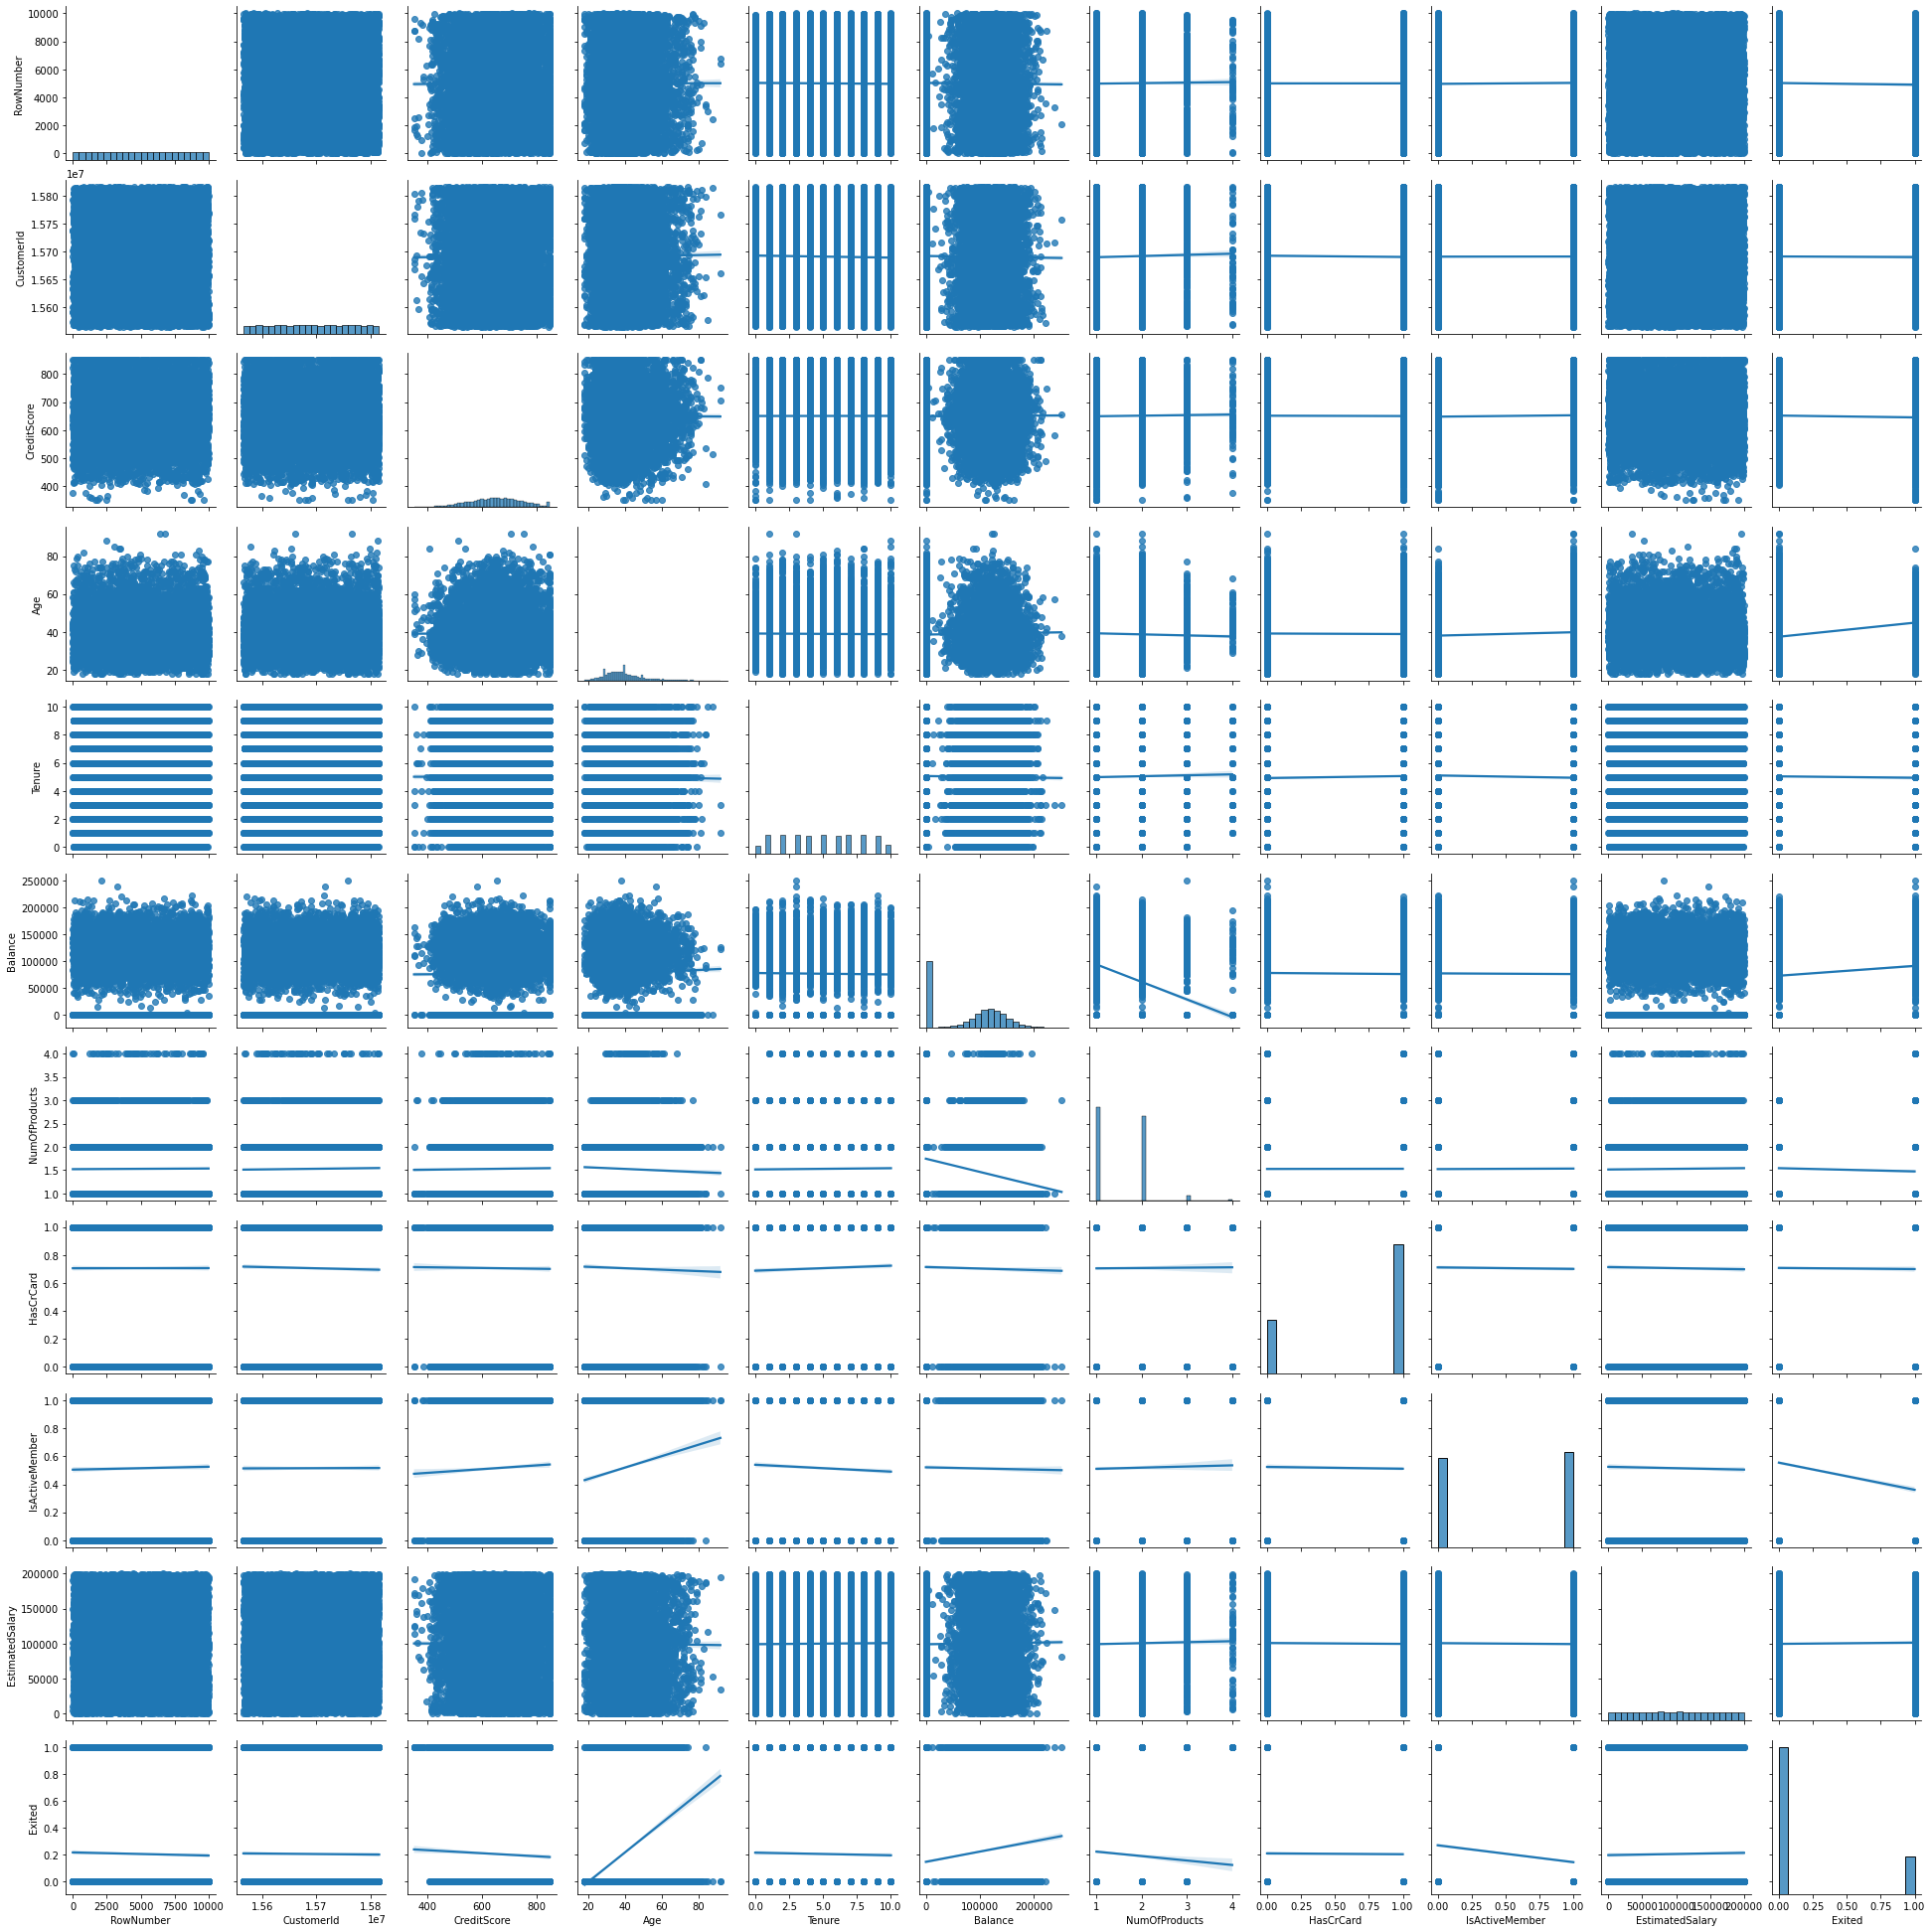

In [33]:
sns.pairplot(df , kind = "reg");

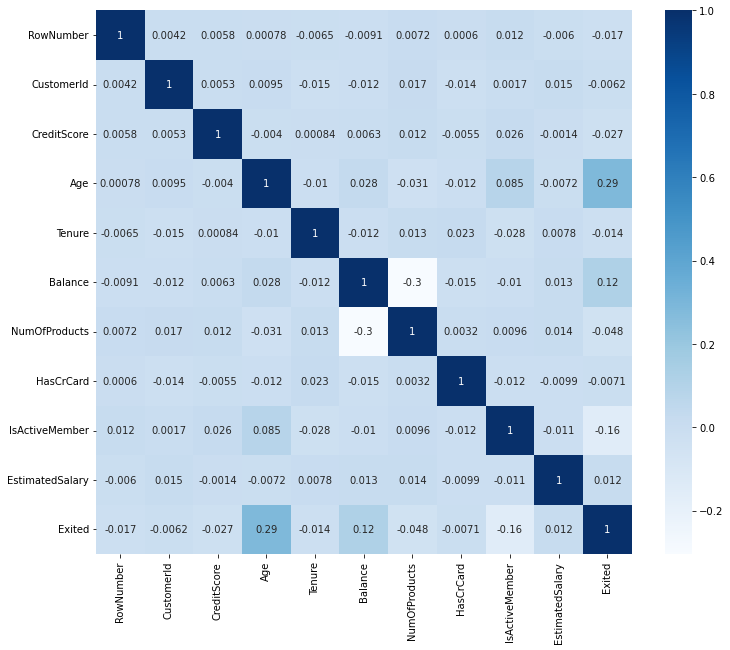

In [34]:
plt.figure(figsize=(12,10))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Blues)
plt.show()
# koyu alanların olması bize değişkenler arasında bir bağlantı olduğunu gösterirdi ama burda 0,5 ten yüksek korelasyonlar olmadığından dolayı dikkate almadım.

In [35]:
df.columns # dataset üzerindeyorumlamya etkisi olmayan RowNumber,CustomerId,Surname sütunlarını kaldırdım.

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [36]:
df= df.drop(['RowNumber', 'CustomerId', 'Surname'],axis=1)

In [37]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


<AxesSubplot:xlabel='Exited', ylabel='count'>

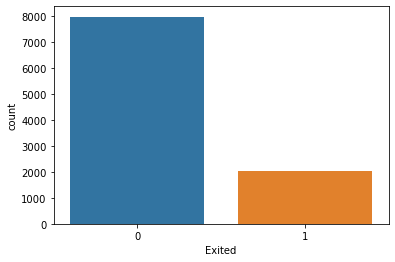

In [412]:
sns.countplot(df["Exited"],label='Count')

In [ ]:
# yukarıda görüldüğü üzere data setinde 0-1 dengesizliği görülmektedir.

## Encoding categorical data ( kategorik verileri kodlama) 

In [421]:
df["Geography"].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [422]:
df =pd.get_dummies(df,columns=["Geography","Gender"],drop_first=True)

In [423]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,1,15634602,Hargrave,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,2,15647311,Hill,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,3,15619304,Onio,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,4,15701354,Boni,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,5,15737888,Mitchell,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


In [424]:
df["CreditScore"].describe().T

count    10000.000000
mean       650.528800
std         96.653299
min        350.000000
25%        584.000000
50%        652.000000
75%        718.000000
max        850.000000
Name: CreditScore, dtype: float64

<AxesSubplot:xlabel='CreditScore'>

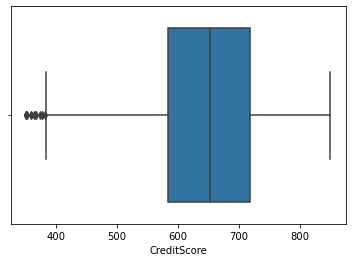

In [425]:
sns.boxplot(df["CreditScore"])

In [426]:
df["CreditScore"].head(10) 

0    619
1    608
2    502
3    699
4    850
5    645
6    822
7    376
8    501
9    684
Name: CreditScore, dtype: int64

In [427]:
df_credit =df["CreditScore"] 

In [428]:
Q1 = df_credit.quantile(0.25) #Eşik değer belirleme
Q3 = df_credit.quantile(0.75)
IQR = Q3-Q1
print("IQR: {} Q1: {} Q3: {}".format(IQR,Q1,Q3))

IQR: 134.0 Q1: 584.0 Q3: 718.0


In [429]:
alt_sinir = Q1- 1.5*IQR #Eşik değer hesaplama
ust_sinir = Q3 + 1.5*IQR
print(alt_sinir,ust_sinir)

383.0 919.0


In [430]:
aykiri_tf = (df_credit< alt_sinir)
aykiri_tf.head(10)

0    False
1    False
2    False
3    False
4    False
5    False
6    False
7     True
8    False
9    False
Name: CreditScore, dtype: bool

In [431]:
df_credit[aykiri_tf]

7       376
942     376
1193    363
1405    359
1631    350
1838    350
1962    358
2473    351
2579    365
8154    367
8723    350
8762    350
9210    382
9356    373
9624    350
Name: CreditScore, dtype: int64

In [432]:
df_credit[aykiri_tf].index

Int64Index([   7,  942, 1193, 1405, 1631, 1838, 1962, 2473, 2579, 8154, 8723,
            8762, 9210, 9356, 9624],
           dtype='int64')

## Age 

In [433]:
df["Age"].describe()

count    10000.000000
mean        38.921800
std         10.487806
min         18.000000
25%         32.000000
50%         37.000000
75%         44.000000
max         92.000000
Name: Age, dtype: float64

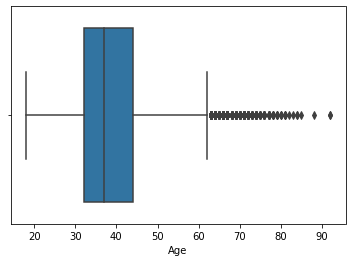

In [434]:
sns.boxplot(df["Age"]);

In [435]:
# yaş değişkeninde aykırı veriler gözüküyor ama bunlar değerli bilgiler olabilir.


## Tenure

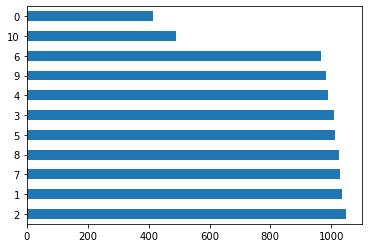

In [436]:
df['Tenure'].value_counts().plot.barh();

In [437]:
df['Tenure'].value_counts()

2     1048
1     1035
7     1028
8     1025
5     1012
3     1009
4      989
9      984
6      967
10     490
0      413
Name: Tenure, dtype: int64

## Balance

In [438]:
df["Balance"].describe()

count     10000.000000
mean      76485.889288
std       62397.405202
min           0.000000
25%           0.000000
50%       97198.540000
75%      127644.240000
max      250898.090000
Name: Balance, dtype: float64

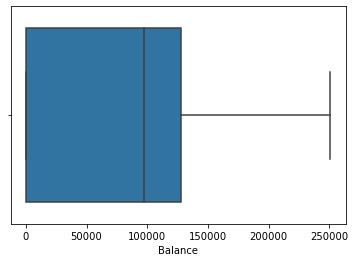

In [439]:
sns.boxplot(df["Balance"]);

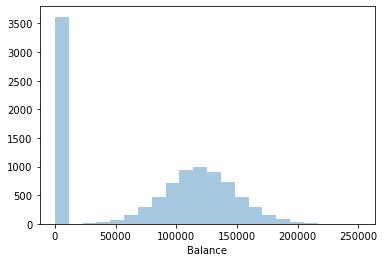

In [440]:
sns.distplot(df["Balance"], kde=False);

## NumOfProducts

In [441]:
df["NumOfProducts"].value_counts()

1    5084
2    4590
3     266
4      60
Name: NumOfProducts, dtype: int64

In [442]:
df.groupby("NumOfProducts").agg({"Exited":"count"})

,Exited
NumOfProducts,
1,5084
2,4590
3,266
4,60


In [443]:
# burada churn olan verilerin azlığından dolayı kesin bir yorum yapamıyorum

## HasCrCard

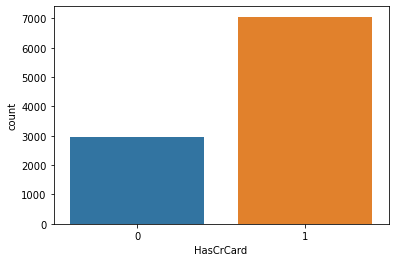

In [444]:
sns.countplot(df["HasCrCard"],label="count");

In [445]:
df['HasCrCard'].corr(df['Exited'])

-0.007137765603039008

In [446]:
# burada kredi kartının olup olmamasıyla çıkışa bir etkisi olmadığını Heatmap'te de farkettiğim gibi burada da ortaya çıktı.

## Geography

In [447]:
def geo(country):
    for i in country:
        if country== "Geography_Spain":
            spain = df[df["Geography_Spain"]==1].shape
            spain_ch =df[(df["Geography_Spain"]==1) & (df["Exited"]==1)].shape
            spain_nch =df[(df["Geography_Spain"]==1) & (df["Exited"]==0)].shape
            a = spain_ch[0]/spain[0]
            b = spain_nch[0]/spain[0]
            return print("ispanya için churn olanlar: {}  churn olmayanlar: {}".format(a,b))
        elif country=="Geography_Germany":
                german = df[df["Geography_Germany"]==1].shape
                german_ch =df[(df["Geography_Germany"]==1) & (df["Exited"]==1)].shape
                german_nch =df[(df["Geography_Germany"]==1) & (df["Exited"]==0)].shape
                a = german_ch[0]/german[0]
                b = german_nch[0]/german[0]
                return print("Almanya için churn olanlar: {}  churn olmayanlar: {}".format(a,b))
            
        elif country == "Geography_France":
            france = df[(df["Geography_Spain"]==0) & (df["Geography_Germany"]==0)].shape
            france_ch= df[(df["Geography_Spain"]==0) & (df["Geography_Germany"]==0) & (df["Exited"]==1)].shape
            france_nch= df[(df["Geography_Spain"]==0) & (df["Geography_Germany"]==0) & (df["Exited"]==0)].shape
            a = france_ch[0]/france[0]
            b = france_nch[0]/france[0]
            return  print("Fransa için churn olanlar: {}  churn olmayanlar: {}".format(a,b))  
        else:
            return print("ülke adını yanlış girdiniz kontrol ediniz!!!")


In [448]:
# Bir fonksiyon yazarak ülklererin terk edip etmeme durmlarını tek tek incelmek istedim.   
# Fransa için ise %16 churn %83 churn değil. 
# İspanya için %17 churn%83 churn değil,
# Almanya için %32 churn %68 churn değil,
# Tüm bunlardan Almanların en çok terk ettiğini gözlemledim.
geo("Geography_Spain")
geo("Geography_Germany")
geo("Geography_France")

ispanya için churn olanlar: 0.1667339523617279  churn olmayanlar: 0.8332660476382721
Almanya için churn olanlar: 0.32443204463929853  churn olmayanlar: 0.6755679553607015
Fransa için churn olanlar: 0.16154766653370561  churn olmayanlar: 0.8384523334662943


In [449]:
geo("Geography_Spain")

ispanya için churn olanlar: 0.1667339523617279  churn olmayanlar: 0.8332660476382721


## Gender

1    5457
0    4543
Name: Gender_Male, dtype: int64
0.5457545754575458


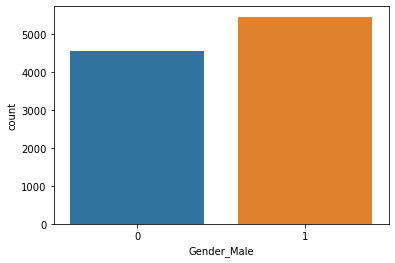

In [450]:
print(df["Gender_Male"].value_counts())
print(5457/9999)
sns.countplot(df["Gender_Male"],label="Count");

### EXITED

In [182]:
df["Exited"].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [183]:
import seaborn as sns 

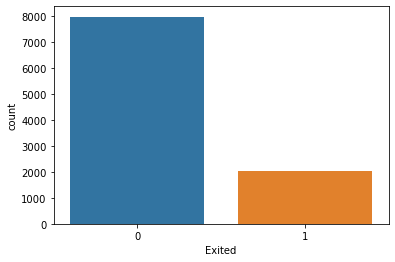

In [451]:
sns.countplot(df["Exited"]);

In [ ]:
# yukarıda gragikte de anlaşıldığı üzere elimde bir dengesiz veri seti olduğunu gözlemlemledim. 
# Dengesiz veri setleriyle başa çıkmak için SMOTE yöntemini kullanacağım.

In [205]:
X = df.drop("Exited",axis=1)
y = df["Exited"]

In [190]:
X

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,0,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,0,1


In [191]:
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [228]:
from sklearn.model_selection import train_test_split

In [234]:
# dengesiz veri setlerinde train/test ayırma işlemi yaparken startify (tabakalı örnekleme) kullandım.
# çünkü azınlıktaki verilerimin kayıbı gibi bir risk söz konusuydu.
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=63,stratify=y)


In [406]:
X_test

array([[-0.76685842, -0.90127836, -0.29265906, ..., -0.57251627,
        -0.46462985,  1.18941503],
       [-0.77774074,  1.39667757, -1.02632226, ..., -0.57251627,
        -0.46462985, -0.84074942],
       [-0.09215462, -0.10198934,  1.17466734, ..., -0.57251627,
        -0.46462985,  1.18941503],
       ...,
       [ 1.1049005 ,  0.09783291,  1.17466734, ...,  1.74667524,
        -0.46462985,  1.18941503],
       [-0.09215462,  0.79721081, -0.29265906, ..., -0.57251627,
        -0.46462985, -0.84074942],
       [-0.46215348,  0.59738855, -1.75998545, ...,  1.74667524,
        -0.46462985, -0.84074942]])

## SMOTE 

In [315]:
from imblearn.over_sampling import SMOTE

In [316]:
X_resamp,y_resamp = SMOTE().fit_resample(X,y)

In [404]:
y_resamp.value_counts()

1    7963
0    7963
Name: Exited, dtype: int64

In [318]:
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

<AxesSubplot:title={'center':'Class distribution after appying SMOTE'}, xlabel='Exited'>

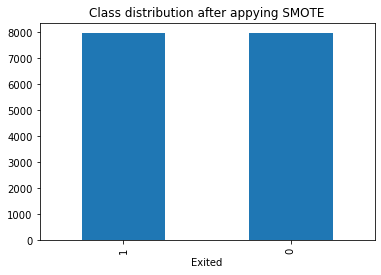

In [319]:
pd.Series(y_resamp).value_counts().plot(kind='bar', title='Class distribution after appying SMOTE', xlabel='Exited')

## features scaling (ölçeklendirme)

In [296]:
from sklearn.preprocessing import StandardScaler

In [297]:
sc = StandardScaler()

In [298]:
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [453]:
X_test

array([[-0.76685842, -0.90127836, -0.29265906, ..., -0.57251627,
        -0.46462985,  1.18941503],
       [-0.77774074,  1.39667757, -1.02632226, ..., -0.57251627,
        -0.46462985, -0.84074942],
       [-0.09215462, -0.10198934,  1.17466734, ..., -0.57251627,
        -0.46462985,  1.18941503],
       ...,
       [ 1.1049005 ,  0.09783291,  1.17466734, ...,  1.74667524,
        -0.46462985,  1.18941503],
       [-0.09215462,  0.79721081, -0.29265906, ..., -0.57251627,
        -0.46462985, -0.84074942],
       [-0.46215348,  0.59738855, -1.75998545, ...,  1.74667524,
        -0.46462985, -0.84074942]])

## Modelleme

In [494]:
def machine_learn_model(model):
    from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
    
    if model == "LogisticRegression":
        from sklearn.linear_model import LogisticRegression
        loj = LogisticRegression()
        loj.fit(X_train,y_train)
        y_pred1=loj.predict(X_test)
        return print("accuracy score: {} recall_score: {}  precision_score: {}  f1_score:{}".format(accuracy_score(y_test,y_pred1) ,recall_score(y_test,y_pred1),precision_score(y_test,y_pred1),f1_score(y_test,y_pred1)))
    
    elif model == "SVC":
        from sklearn.svm import SVC
        svm = SVC(random_state=63)
        svm.fit(X_train,y_train)
        y_pred2 = svm.predict(X_test)
        a = accuracy_score(y_test,y_pred2)
        return print("accuracy score: {} recall_score: {}  precision_score: {}  f1_score:{}".format(accuracy_score(y_test,y_pred2) ,recall_score(y_test,y_pred2),precision_score(y_test,y_pred2),f1_score(y_test,y_pred2)))
    elif model == "LGBM":
        from lightgbm import LGBMClassifier
        lgbm_model= LGBMClassifier().fit(X_train,y_train)
        y_pred3 = lgbm_model.predict(X_test)
        c = accuracy_score(y_test,y_pred3)
        return print("accuracy score: {} recall_score: {}  precision_score: {}  f1_score:{}".format(accuracy_score(y_test,y_pred3) ,recall_score(y_test,y_pred3),precision_score(y_test,y_pred3),f1_score(y_test,y_pred3)))
    elif model == "GBC":
        from sklearn.ensemble import GradientBoostingClassifier
        gbm_model = GradientBoostingClassifier().fit(X_train,y_train)
        d = y_pred4 =gbm_model.predict(X_test)
        accuracy_score(y_test,y_pred4)
        return print("accuracy score: {} recall_score: {}  precision_score: {}  f1_score:{}".format(accuracy_score(y_test,y_pred4) ,recall_score(y_test,y_pred4),precision_score(y_test,y_pred4),f1_score(y_test,y_pred4)))
    elif model == "RF":
        from sklearn.ensemble import RandomForestClassifier
        rndm_f = RandomForestClassifier().fit(X_train,y_train)
        e = y_pred5 = rndm_f.predict(X_test)
        accuracy_score(y_test,y_pred5)
        return print("accuracy score: {} recall_score: {}  precision_score: {}  f1_score:{}".format(accuracy_score(y_test,y_pred5) ,recall_score(y_test,y_pred5),precision_score(y_test,y_pred5),f1_score(y_test,y_pred5)))
   

In [486]:
machine_learn_model("LogisticRegression")

accuracy score: 0.7790332705586943 recall_score: 0.7905531385954009  precision_score: 0.7760829774252593  f1_score:0.7832512315270936


In [489]:
machine_learn_model("SVC")

accuracy score: 0.8421217827997489 recall_score: 0.8353014294592915  precision_score: 0.8495575221238938  f1_score:0.8423691632717016


In [481]:
machine_learn_model("LGBM")

accuracy score: 0.8553044569993723 recall_score: 0.8446239900559354  precision_score: 0.8656050955414013  f1_score:0.8549858446052216


In [484]:
machine_learn_model("GBC")

accuracy score: 0.8383553044569994 recall_score: 0.8253573648228714  precision_score: 0.8501920614596671  f1_score:0.837590665405235


In [478]:
machine_learn_model("RF")

accuracy score: 0.8581293157564344 recall_score: 0.8502175264139217  precision_score: 0.8663711209626346  f1_score:0.8582183186951067


In [515]:
def comprasion(models):
    if models == "all_model":
        from sklearn.linear_model import LogisticRegression
        loj = LogisticRegression()
        loj.fit(X_train,y_train)
        y_pred1=loj.predict(X_test)
        a = accuracy_score(y_test,y_pred1)
        
        from sklearn.svm import SVC
        svm = SVC(random_state=63)
        svm.fit(X_train,y_train)
        y_pred2 = svm.predict(X_test)
        b = accuracy_score(y_test,y_pred2)
        
        from lightgbm import LGBMClassifier
        lgbm_model= LGBMClassifier().fit(X_train,y_train)
        y_pred3 = lgbm_model.predict(X_test)
        c = accuracy_score(y_test,y_pred3)
        
        from sklearn.ensemble import GradientBoostingClassifier
        gbm_model = GradientBoostingClassifier().fit(X_train,y_train)
        y_pred4 =gbm_model.predict(X_test)
        d = accuracy_score(y_test,y_pred4)
        
        from sklearn.ensemble import RandomForestClassifier
        rndm_f = RandomForestClassifier().fit(X_train,y_train)
        y_pred5 = rndm_f.predict(X_test)
        e = accuracy_score(y_test,y_pred5)
        
        all_model = pd.DataFrame({'Model':["LR",'SVC','LGBM','GBC','RF'],
                                 "Accuracy":[a,b,c,d,e]})
        
        graph = sns.barplot(all_model["Model"],all_model["Accuracy"])
        return all_model,graph

(  Model  Accuracy
 0    LR  0.779033
 1   SVC  0.842122
 2  LGBM  0.855304
 3   GBC  0.838355
 4    RF  0.855932,
 <AxesSubplot:xlabel='Model', ylabel='Accuracy'>)

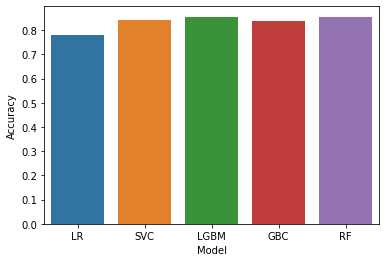

In [516]:
comprasion("all_model")

In [ ]:
# Model karşılaştırması için bir fonksiyon oluşturdum.
# ve bunun sonucunda en iyi tahminin Random Forest(RF) modlinin olduğunu gözlemledim.

## RF modelinin işlenmesi

In [386]:
x_res = sc.fit_transform(X_res)

In [517]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report

rndm_f = RandomForestClassifier().fit(X_train,y_train)
y_pred5 = rndm_f.predict(X_test)

cv_results = cross_val_score(rndm_f, X_train, y_train, cv = 10, scoring= "accuracy")

print(cv_results.mean())
print(accuracy_score(y_test, y_pred5))
print(classification_report(y_test, y_pred5))



0.8551020408163265
0.8565599497802887
              precision    recall  f1-score   support

           0       0.85      0.87      0.86      1577
           1       0.87      0.85      0.86      1609

    accuracy                           0.86      3186
   macro avg       0.86      0.86      0.86      3186
weighted avg       0.86      0.86      0.86      3186



In [388]:
rndm_f.fit(X_resamp,y_resamp)

RandomForestClassifier()

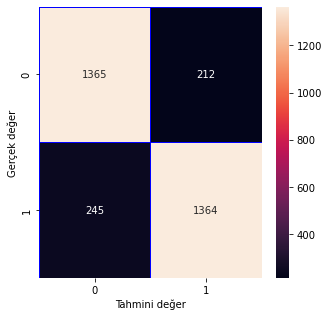

In [521]:
y_pred5 = rndm_f.predict(X_test)
y_true = y_test
#%% confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true,y_pred5)
import seaborn as sns
import matplotlib.pyplot as plt

f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm,annot = True,linewidths=0.5,linecolor="blue",fmt = ".0f",ax=ax)
plt.xlabel("Tahmini değer")
plt.ylabel("Gerçek değer")
plt.show()

## Model Tuning

In [ ]:
# yaptığım bir kaç deneme sonucu en iyi değerlerin varsayılan değerler olduğunu gözlemledim.
# bu yüzden de Tuning işlemini yapmamayı tercih ettim.

### Modelin manuel testi 

In [ ]:
## Modeli kendim de test etmek istedim. 
## Kendim rastgele değerler vererek (sonucunu bildiğim verileri listeden seçtim) sonucunu gözlemledim.

In [389]:
import joblib

In [390]:
joblib.dump(rndm_f,"churn_tahmin")


['churn_tahmin']

In [391]:
model = joblib.load('churn_tahmin')

In [392]:
df.columns

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited', 'Geography_Germany',
       'Geography_Spain', 'Gender_Male'],
      dtype='object')

In [410]:
model.predict([[619,42,2,0.0,0,0,0,101348.88,0,0,0]])

array([1], dtype=int64)

In [411]:
model.predict([[684,27,2,134603.88,1,1,1,71725.73,0,0,1]])


array([0], dtype=int64)

## RAPOR 

### Doğru tahmin edilenler --> %85.81 yani 3186 veriden 2729 doğru tahmin
- True Negative:  1365 churn değil tahmin etmiş ve doğru tahmin 
- True Positive 1364 churn tahmin edilmiş ve churn olmuş

### Yanlış tahmin edilenler --> % 14.19 yani 3186 tahminden 457 tanesi yanlış tahmin
- False positive 212 kişi churn olacağı tahmin edilmemiş ama churn olmamış
- False negative 245 kişi churn olmayacağını tahmin etmiş ama churn 